In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


INFILE = "C:\\Users\\Owner\\Documents\\Northwestern\\Intro_MachineLearning\\Unit1\\Lecture02B_MissingValueImputationForNumericVariables\\Insurance.csv"

TARGET_F = "TARGET_CLM_FLAG"
TARGET_A = "TARGET_CLM_AMT"

In [2]:
df = pd.read_csv( INFILE )
dt = df.dtypes
#print( dt )

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


print(" NUMBER ")
print(" ------- ")
for i in numList :
   print( i )
print(" ------- ")

 NUMBER 
 ------- 
KIDSDRIV
AGE
HOMEKIDS
YOJ
INCOME
HOME_VAL
TRAVTIME
BLUEBOOK
TIF
NPOLICY
OLDCLAIM
CLM_FREQ
MVR_PTS
CAR_AGE
 ------- 


In [3]:
"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

In [4]:
'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''

df["y_EDU_4"] = (df.EDUCATION.isin( ["a_PhD"] ) + 0 )
df["y_EDU_3"] = (df.EDUCATION.isin( ["a_PhD","b_Masters"] ) + 0)
df["y_EDU_2"] = (df.EDUCATION.isin( ["a_PhD","b_Masters","c_Bachelors"] ) + 0)
df["y_EDU_1"] = (df.EDUCATION.isin( ["a_PhD","b_Masters","c_Bachelors","d_High School"] ) + 0)
df = df.drop( "EDUCATION", axis=1 )
   

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )

In [5]:
#g = df.groupby("IMP_JOB")
#i = "INCOME"
#print( g[i].median() )

i = "INCOME"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Blue Collar"]), IMP ] = 53694
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Student"]), IMP ] = 360
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Clerical"]), IMP ] = 30799
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Doctor"]), IMP ] = 121398
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Home Maker"]), IMP ] = 776
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Lawyer"]), IMP ] = 83230
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 109953
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Manager"]), IMP ] = 78589
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Professional"]), IMP ] = 71230
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)



for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )
    


In [6]:
"""
Remove Outliers
"""

dt = df.dtypes
numList = []
for i in dt.index :
    #print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )


for i in numList:
   print(i)

##print(" NUMBER ")
##print(" ------- ")
##for i in numList :
##    print( df[i].describe() )
##    print(" -------\n ")


##for i in numList :
##    print( i )
##    plt.hist( df[ i ] )
##    plt.xlabel( i )
##    plt.show()

KIDSDRIV
HOMEKIDS
TRAVTIME
BLUEBOOK
TIF
NPOLICY
OLDCLAIM
CLM_FREQ
MVR_PTS
IMP_INCOME
IMP_AGE
IMP_YOJ
IMP_HOME_VAL
IMP_CAR_AGE


TRUNC_TRUNC_KIDSDRIV
TRUNC_TRUNC_HOMEKIDS
TRUNC_TRUNC_TRAVTIME
TRUNC_TRUNC_BLUEBOOK
TRUNC_TRUNC_TIF
TRUNC_TRUNC_NPOLICY
TRUNC_TRUNC_OLDCLAIM
TRUNC_TRUNC_CLM_FREQ
TRUNC_TRUNC_MVR_PTS
TRUNC_TRUNC_IMP_INCOME
TRUNC_TRUNC_IMP_AGE
TRUNC_TRUNC_IMP_YOJ
TRUNC_TRUNC_IMP_HOME_VAL
TRUNC_TRUNC_IMP_CAR_AGE
TRUNC_TRUNC_KIDSDRIV


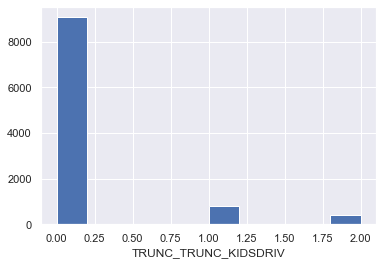

TRUNC_TRUNC_HOMEKIDS


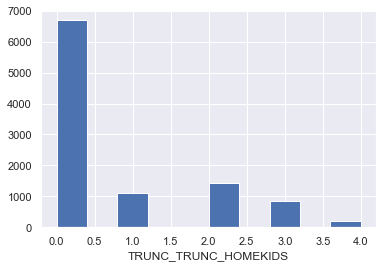

TRUNC_TRUNC_TRAVTIME


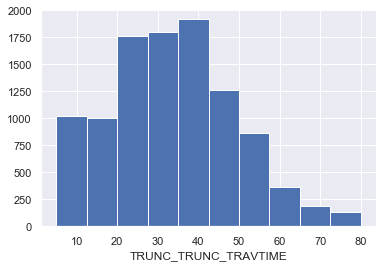

TRUNC_TRUNC_BLUEBOOK


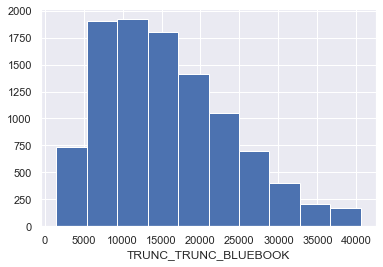

TRUNC_TRUNC_TIF


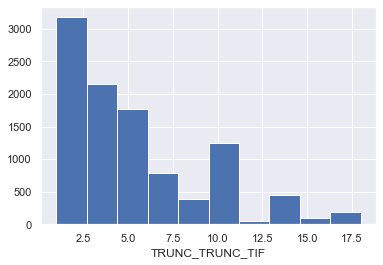

TRUNC_TRUNC_NPOLICY


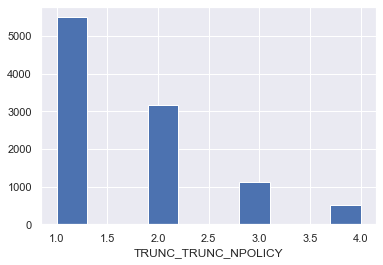

TRUNC_TRUNC_OLDCLAIM


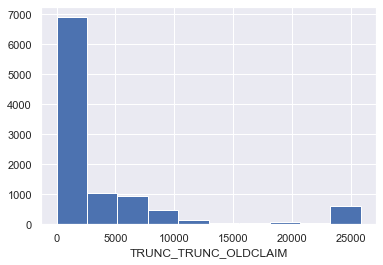

TRUNC_TRUNC_CLM_FREQ


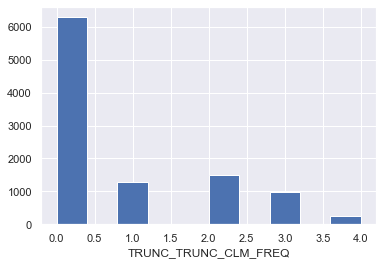

TRUNC_TRUNC_MVR_PTS


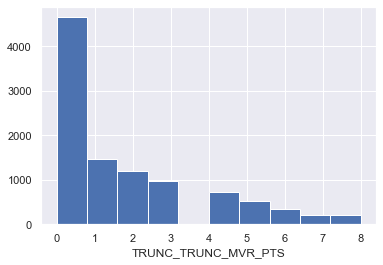

TRUNC_TRUNC_IMP_INCOME


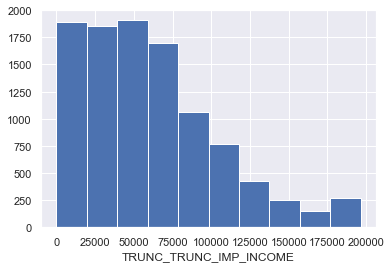

TRUNC_TRUNC_IMP_AGE


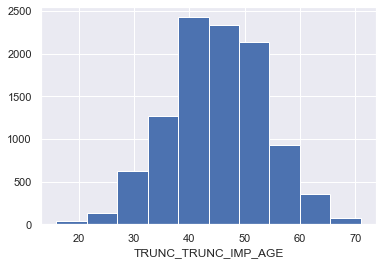

TRUNC_TRUNC_IMP_YOJ


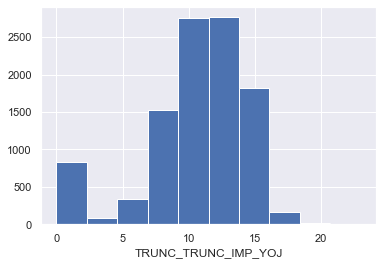

TRUNC_TRUNC_IMP_HOME_VAL


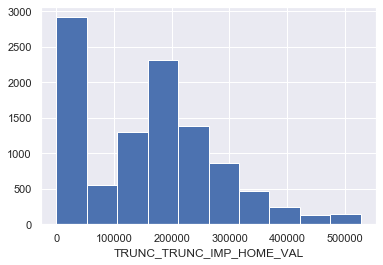

TRUNC_TRUNC_IMP_CAR_AGE


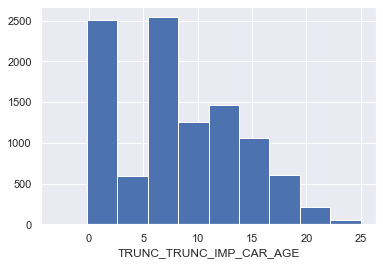

In [8]:
#Assigns outliers to be theCutoff value i.e mean+3sd 
#just going to have the TRUNC variables because the O_variables are int32

for i in numList :
    #print(" ------- ")
    #print(i)
    theMean = df[i].mean()
    theSD = df[i].std()
    theMax = df[i].max()
    theCutoff = round( theMean + 3*theSD )
    if theMax < theCutoff : continue
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    df[ FLAG ] = ( df[i] > theCutoff )+ 0
    df[ TRUNC ] = df[ i ]
    df.loc[ df[TRUNC] > theCutoff, TRUNC ] = theCutoff
    df = df.drop( i, axis=1 )


dt = df.dtypes
numList = []
for i in dt.index :
    #print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )
    #if dt[i] in (["float64"]) : numList.append( i )

for i in numList :
   print(i)



##print(" ------- ")
##print(" NUMBER ")
##print(" ------- ")
##for i in numList :
##    print( df[i].describe() )
##    print(" -------\n ")
##

for i in numList :
   print( i )
   plt.hist( df[ i ] )
   plt.xlabel( i )
   plt.show()